In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split
from utils.data_utils import perform_data_cleaning

In [10]:
from sklearn import set_config

set_config(transform_output="pandas")

#### Load the Data

In [11]:
# load the data

df = pd.read_csv('notebooks/swiggy.csv')

#### Clean data

In [12]:
perform_data_cleaning(df)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,extracted_city,order_day,order_month,order_day_of_week,order_is_weekend,pickup_time_minutes,order_time_hour,time_of_day,distance_km,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,INDO,19,3,Saturday,1,15.0,11.0,morning,3.020737,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,BANG,25,3,Friday,0,5.0,19.0,evening,20.143737,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,BANG,19,3,Saturday,1,15.0,8.0,morning,1.549693,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,COIMB,5,4,Tuesday,0,10.0,18.0,evening,7.774497,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,CHEN,26,3,Saturday,1,15.0,13.0,afternoon,6.197898,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,JAP,24,3,Thursday,0,10.0,11.0,morning,1.488112,short
45589,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,AGR,16,2,Wednesday,0,15.0,19.0,evening,NaN,NaN
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,CHEN,11,3,Friday,0,15.0,23.0,night,4.648024,short
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,COIMB,7,3,Monday,0,5.0,13.0,afternoon,6.219668,medium


In [13]:
# load the cleaned data

df = pd.read_csv('clean_data.csv')

df

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,extracted_city,order_day,order_month,order_day_of_week,order_is_weekend,pickup_time_minutes,order_time_hour,time_of_day,distance_km,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,INDO,19,3,Saturday,1,15.0,11.0,morning,3.020737,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,BANG,25,3,Friday,0,5.0,19.0,evening,20.143737,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,BANG,19,3,Saturday,1,15.0,8.0,morning,1.549693,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,COIMB,5,4,Tuesday,0,10.0,18.0,evening,7.774497,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,CHEN,26,3,Saturday,1,15.0,13.0,afternoon,6.197898,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,JAP,24,3,Thursday,0,10.0,11.0,morning,1.488112,short
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,AGR,16,2,Wednesday,0,15.0,19.0,evening,NaN,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,CHEN,11,3,Friday,0,15.0,23.0,night,4.648024,short
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,COIMB,7,3,Monday,0,5.0,13.0,afternoon,6.219668,medium


In [14]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'extracted_city', 'order_day', 'order_month',
       'order_day_of_week', 'order_is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'time_of_day', 'distance_km', 'distance_type'],
      dtype='object')

In [15]:
# drop columns not required for model input

columns_to_drop =  ['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day"]

df.drop(columns=columns_to_drop, inplace=True)

df

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,extracted_city,order_month,order_day_of_week,order_is_weekend,pickup_time_minutes,time_of_day,distance_km,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24,INDO,3,Saturday,1,15.0,morning,3.020737,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,BANG,3,Friday,0,5.0,evening,20.143737,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,BANG,3,Saturday,1,15.0,morning,1.549693,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,COIMB,4,Tuesday,0,10.0,evening,7.774497,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,CHEN,3,Saturday,1,15.0,afternoon,6.197898,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,JAP,3,Thursday,0,10.0,morning,1.488112,short
45498,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,36,AGR,2,Wednesday,0,15.0,evening,NaN,NaN
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,CHEN,3,Friday,0,15.0,night,4.648024,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,COIMB,3,Monday,0,5.0,afternoon,6.219668,medium


In [16]:
# check for missing values

df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
extracted_city            0
order_month               0
order_day_of_week         0
order_is_weekend          0
pickup_time_minutes    1640
time_of_day            2070
distance_km            3630
distance_type          3630
dtype: int64

In [17]:
# check for duplicates

df.duplicated().sum()

np.int64(0)

<Axes: >

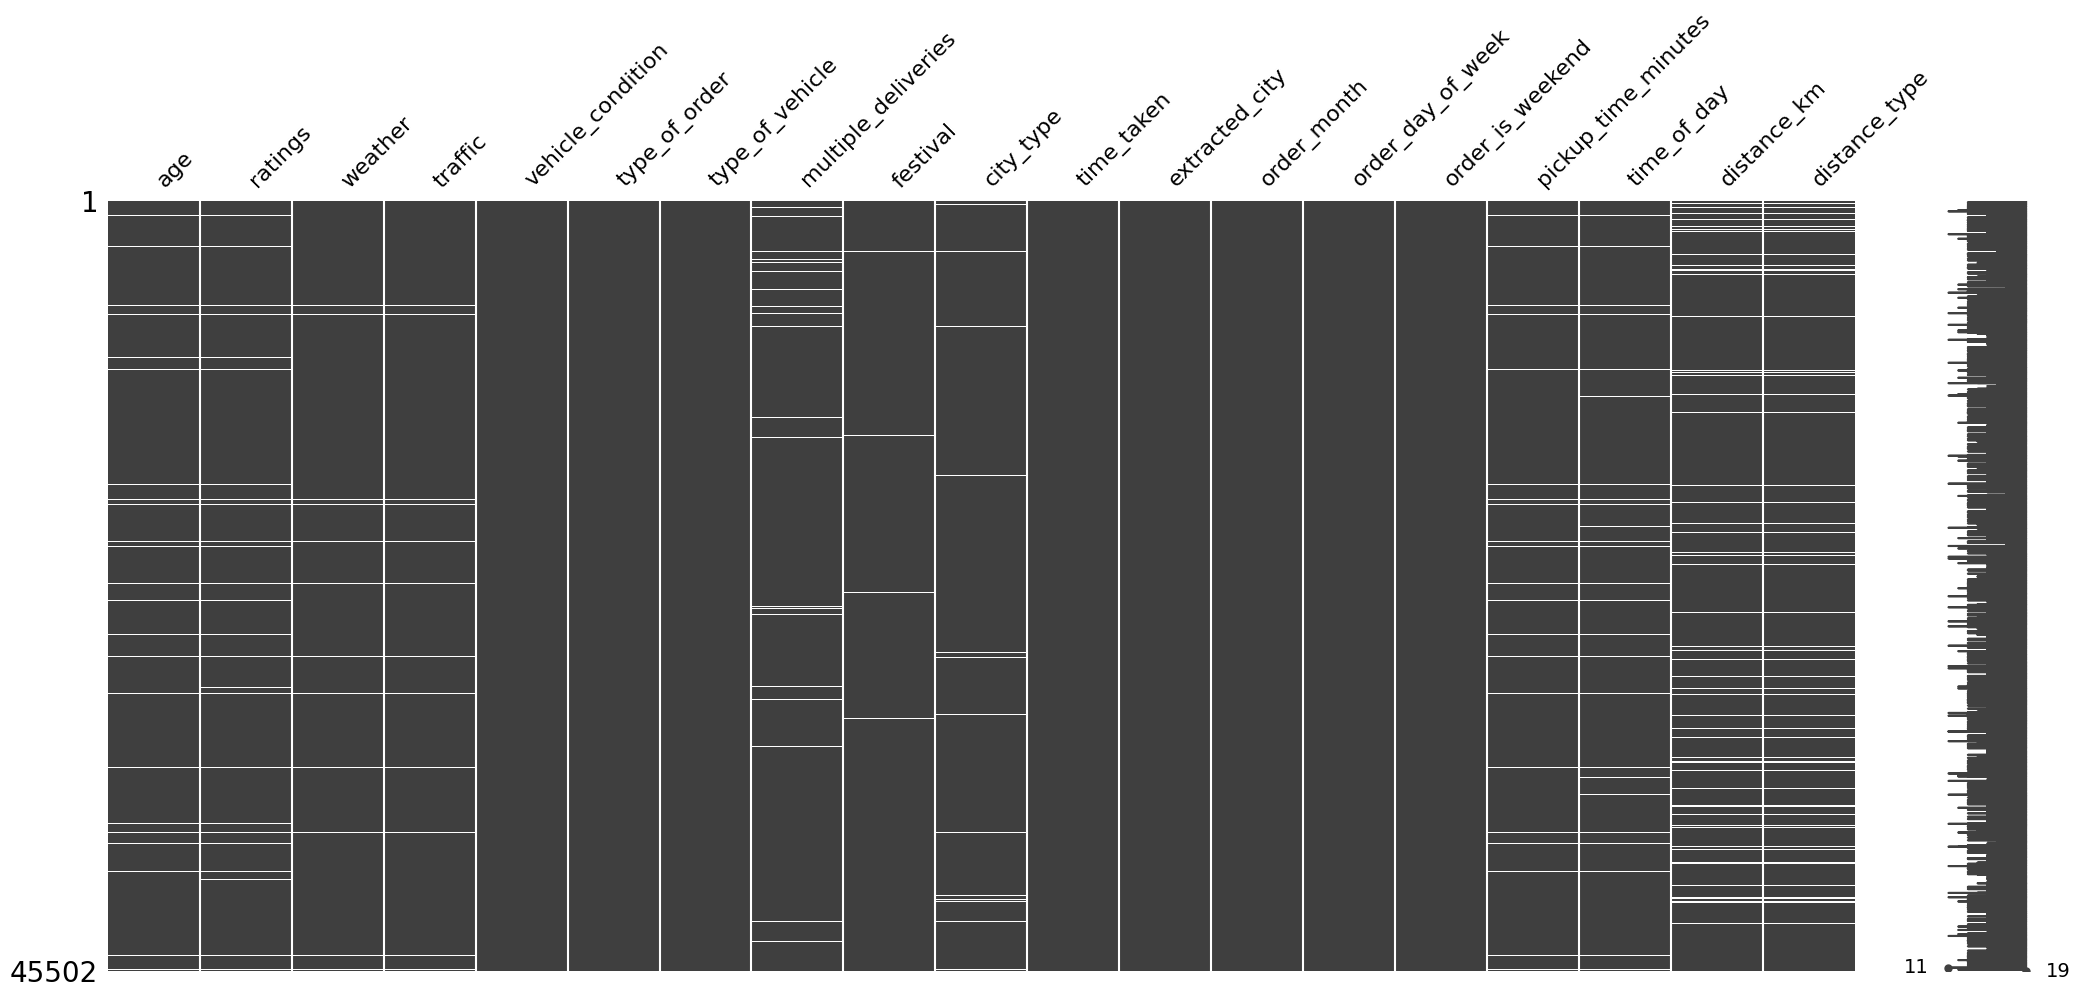

In [18]:
import missingno as msno

msno.matrix(df)

In [19]:
# columns that have missing values

missing_cols = (
                    df
                    .isna()
                    .any(axis=0)
                    .loc[lambda x: x]
                    .index
                )

missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'time_of_day',
       'distance_km', 'distance_type'],
      dtype='object')

#### Data Prep

In [20]:
temp_df = df.copy().dropna()

In [21]:
# split into X and y

X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

X

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,extracted_city,order_month,order_day_of_week,order_is_weekend,pickup_time_minutes,time_of_day,distance_km,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,INDO,3,Saturday,1,15.0,morning,3.020737,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,BANG,3,Friday,0,5.0,evening,20.143737,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,BANG,3,Saturday,1,15.0,morning,1.549693,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,COIMB,4,Tuesday,0,10.0,evening,7.774497,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,CHEN,3,Saturday,1,15.0,afternoon,6.197898,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45496,35.0,4.2,windy,jam,2,drinks,motorcycle,1.0,no,metropolitian,RANCHI,3,Tuesday,0,10.0,night,16.576800,very_long
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,JAP,3,Thursday,0,10.0,morning,1.488112,short
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,CHEN,3,Friday,0,15.0,night,4.648024,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,COIMB,3,Monday,0,5.0,afternoon,6.219668,medium


In [22]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (30156, 18)
The shape of test data is (7539, 18)


In [24]:
y_train

8708     49
25198    31
34049    11
25987    24
37121    31
         ..
20239    30
7590     24
13610    15
1045     26
18968    28
Name: time_taken, Length: 30156, dtype: int64

In [25]:
# missing data in training data

X_train.isna().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
extracted_city         0
order_month            0
order_day_of_week      0
order_is_weekend       0
pickup_time_minutes    0
time_of_day            0
distance_km            0
distance_type          0
dtype: int64

In [26]:
X_train.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'extracted_city', 'order_month', 'order_day_of_week',
       'order_is_weekend', 'pickup_time_minutes', 'time_of_day', 'distance_km',
       'distance_type'],
      dtype='object')

In [27]:
len(X_train.columns)

18

In [28]:
# do basic preprocessing

num_cols = ["age","ratings","pickup_time_minutes","distance_km"]

nominal_cat_cols = ['weather','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type","extracted_city","order_month",
                    "order_day_of_week",
                    "order_is_weekend",
                    "time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [29]:
len(num_cols + nominal_cat_cols + ordinal_cat_cols)

16

In [30]:
for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['jam' 'medium' 'high' 'low']
distance_type ['medium' 'short' 'long' 'very_long']


In [31]:
# generate order for ordinal encoding

traffic_order = ["low","medium","high","jam"]

distance_type_order = ["short","medium","long","very_long"]

In [32]:
# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order]), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

preprocessor.set_output(transform="pandas")

,transformers,"[('scale', ...), ('nominal_encode', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,False
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [33]:
# transform the data

X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

X_train_trans

f:\Project\Delivery-Time-Prediction\epsilon\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


,age,ratings,pickup_time_minutes,distance_km,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,order_day_of_week_Tuesday,order_day_of_week_Wednesday,order_is_weekend_1,time_of_day_evening,time_of_day_morning,time_of_day_night,traffic,distance_type,vehicle_condition,multiple_deliveries
8708,0.473684,0.56,1.0,0.403775,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0,2.0
25198,1.000000,0.76,0.0,0.154040,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1.0
34049,0.473684,0.80,0.5,0.002414,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1,0.0
25987,1.000000,0.92,1.0,0.460433,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0,1.0
37121,0.526316,0.76,0.5,0.243420,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20239,0.578947,0.92,0.5,0.452080,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,0,0.0
7590,0.052632,1.00,1.0,0.612330,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1,1.0
13610,0.526316,0.92,0.0,0.322575,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0.0
1045,0.947368,0.96,0.5,0.004398,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1.0


In [34]:
# transform target column

pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [35]:
pt.lambdas_

array([0.32446096])

In [36]:
y_train_pt

,x0
0,2.028672
1,0.554539
2,-2.024267
3,-0.173699
4,0.554539
...,...
30151,0.457580
30152,-0.173699
30153,-1.350937
30154,0.047111


#### Train Initial Baseline Model

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_trans,y_train_pt)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
# get the predictions
y_pred_train = lr.predict(X_train_trans)
y_pred_test = lr.predict(X_test_trans)

In [39]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [40]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 4.70 minutes
The test error is 4.69 minutes


In [41]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.60
The test r2 score is 0.60


### Impute Missing values

In [43]:
temp_df = df.copy()

In [44]:
# split into X and y

X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

X

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,extracted_city,order_month,order_day_of_week,order_is_weekend,pickup_time_minutes,time_of_day,distance_km,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,INDO,3,Saturday,1,15.0,morning,3.020737,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,BANG,3,Friday,0,5.0,evening,20.143737,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,BANG,3,Saturday,1,15.0,morning,1.549693,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,COIMB,4,Tuesday,0,10.0,evening,7.774497,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,CHEN,3,Saturday,1,15.0,afternoon,6.197898,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,JAP,3,Thursday,0,10.0,morning,1.488112,short
45498,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,AGR,2,Wednesday,0,15.0,evening,NaN,NaN
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,CHEN,3,Friday,0,15.0,night,4.648024,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,COIMB,3,Monday,0,5.0,afternoon,6.219668,medium


In [45]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (36401, 18)
The shape of test data is (9101, 18)


In [47]:
# missing values in train data

X_train.isna().sum()

age                    1470
ratings                1510
weather                 421
traffic                 407
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     795
festival                188
city_type               968
extracted_city            0
order_month               0
order_day_of_week         0
order_is_weekend          0
pickup_time_minutes    1298
time_of_day            1646
distance_km            2931
distance_type          2931
dtype: int64

In [48]:
# transform target column

pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [49]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'time_of_day',
       'distance_km', 'distance_type'],
      dtype='object')

In [50]:
# percentage of rows in data having missing values

(
    X_train
    .isna()
    .any(axis=1)
    .mean()
    .round(2) * 100
)

np.float64(17.0)

#### Age

In [51]:
X_train['age'].describe()

count    34931.000000
mean        29.569551
std          5.752869
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: age, dtype: float64

In [52]:
# missing values in the column

X_train['age'].isna().sum()

np.int64(1470)

In [53]:
# median value

age_median = X_train['age'].median()

Avg and Median values are similar, impute the age column with median value

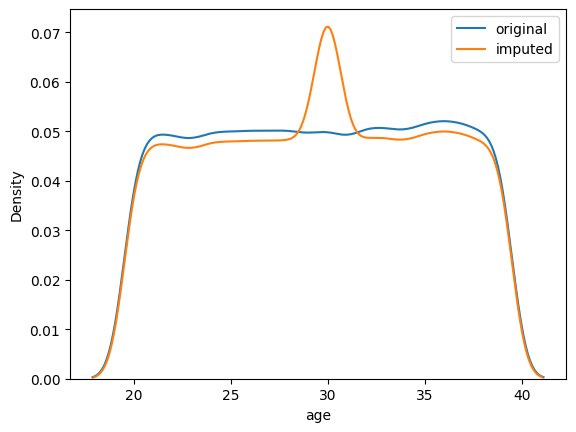

In [54]:
# plot the kde plot

sns.kdeplot(X_train['age'],label="original")
sns.kdeplot(X_train['age'].fillna(age_median),label="imputed")
plt.legend()

Observation:

Changed the distribution of the age column.
Use Advanced imputation techniques like KNN imputer.

#### Ratings

In [55]:
# statistical summary

X_train['ratings'].describe()

count    34891.000000
mean         4.635058
std          0.314049
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: ratings, dtype: float64

In [56]:
# missing values

X_train['ratings'].isna().sum()

np.int64(1510)

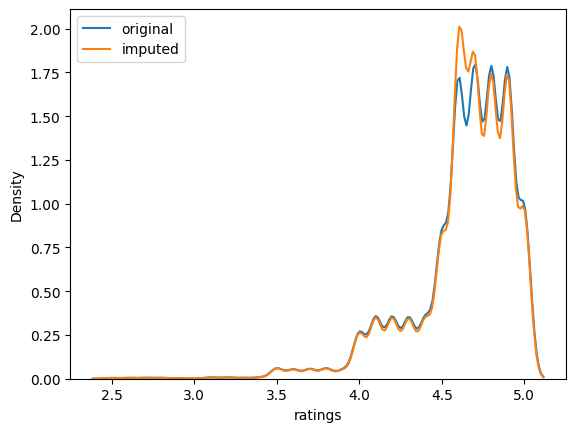

In [57]:
# avg rating

ratings_mean = X_train['ratings'].mean()

# fill and plot kdeplot

sns.kdeplot(X_train['ratings'],label="original")
sns.kdeplot(X_train['ratings'].fillna(ratings_mean),label="imputed")
plt.legend()

#### Weather

In [58]:
# value counts

X_train['weather'].value_counts()

weather
fog           6160
stormy        6051
cloudy        6033
sandstorms    5958
windy         5928
sunny         5850
Name: count, dtype: int64

In [59]:
# missing values in the column

X_train['weather'].isna().sum()

np.int64(421)

<Axes: xlabel='count', ylabel='weather'>

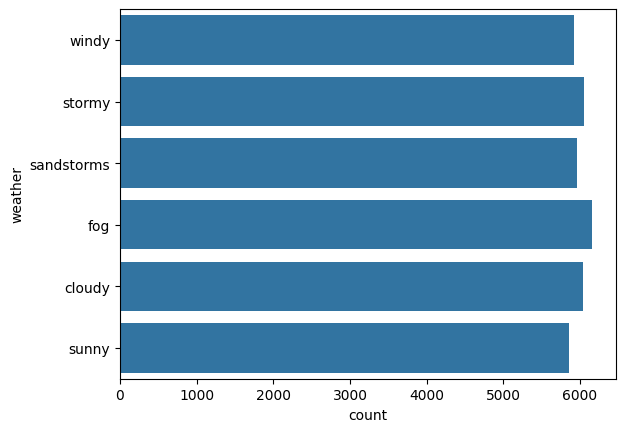

In [60]:
# countplot

sns.countplot(X_train['weather'])

No dominant category to impute from

In [61]:
# capture the missingness

missing_weather = MissingIndicator()
missing_weather.set_output(transform="pandas")

pd.concat([X_train['weather'],missing_weather.fit_transform(X_train[['weather']])],axis=1).sample(50)

,weather,missingindicator_weather
23642,sandstorms,False
29068,sunny,False
14810,stormy,False
44893,fog,False
39991,fog,False
36554,cloudy,False
8840,windy,False
5655,windy,False
43767,fog,False
16893,fog,False


#### Traffic

In [62]:
# value counts

X_train['traffic'].value_counts()

traffic
low       12323
jam       11320
medium     8773
high       3578
Name: count, dtype: int64

In [63]:
# Missing values in column

X_train['traffic'].isna().sum()

np.int64(407)

<Axes: xlabel='count', ylabel='traffic'>

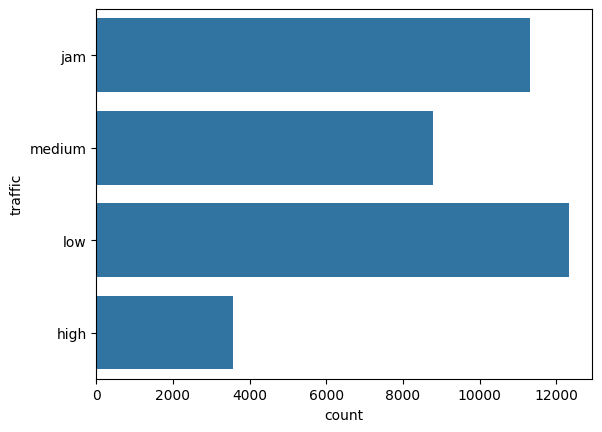

In [64]:
# countplot

sns.countplot(X_train['traffic'])

No dominant category

In [65]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'time_of_day',
       'distance_km', 'distance_type'],
      dtype='object')

#### Multiple Deliveries

In [66]:
# value counts

X_train['multiple_deliveries'].value_counts()

multiple_deliveries
1.0    22487
0.0    11252
2.0     1599
3.0      268
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='multiple_deliveries'>

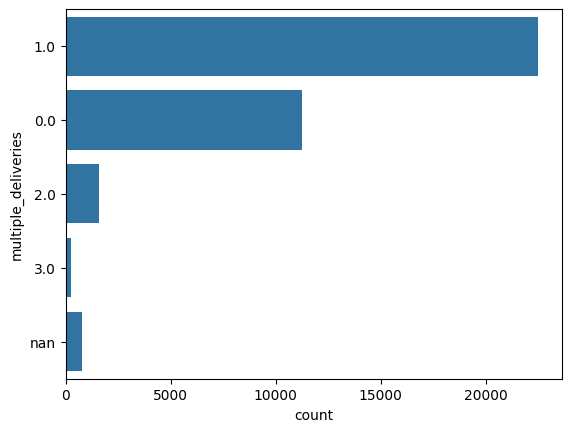

In [67]:
# countplot

sns.countplot(X_train['multiple_deliveries'].apply(str))

In [68]:
# number of missing values

X_train['multiple_deliveries'].isna().sum()

np.int64(795)

In [69]:
# mode value

multiple_deliveries_mode = X_train['multiple_deliveries'].mode()[0]

<Axes: xlabel='count', ylabel='multiple_deliveries'>

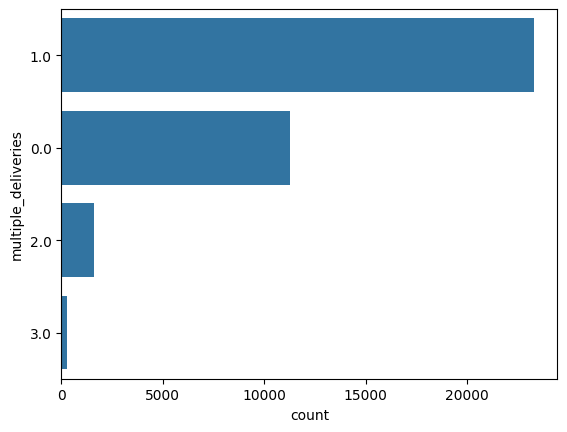

In [70]:
# fill na values with mode

sns.countplot(X_train['multiple_deliveries'].fillna(multiple_deliveries_mode).apply(str))

Mode can be used for this column as an imputation technique

#### Festival

In [71]:
# value counts

X_train['festival'].value_counts()

festival
no     35474
yes      739
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='festival'>

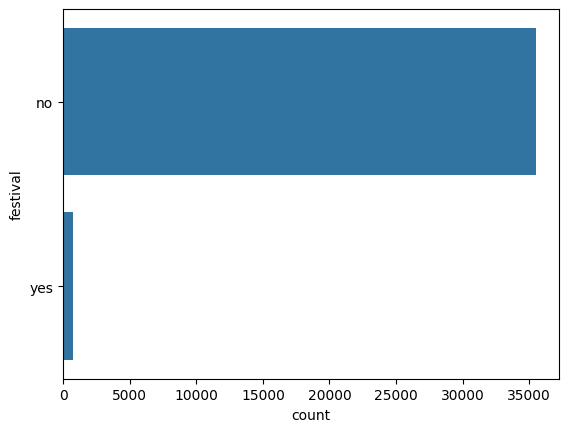

In [72]:
# countplot

sns.countplot(X_train['festival'])

In [73]:
# missing values in column

X_train['festival'].isna().sum()

np.int64(188)

In [74]:
# mode value

festival_mode = X_train['festival'].mode()[0]

<Axes: xlabel='count', ylabel='festival'>

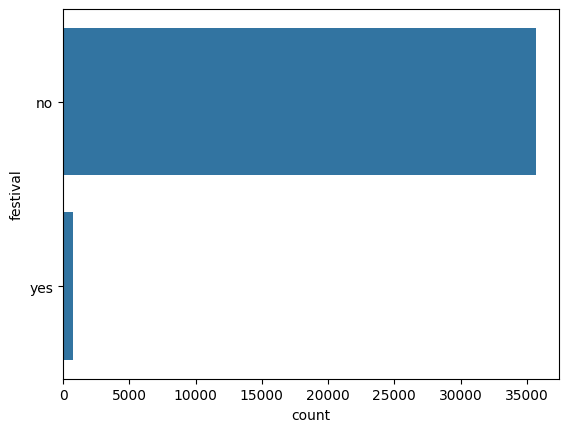

In [75]:
# fill with mode

sns.countplot(X_train['festival'].fillna(festival_mode))

#### City type

In [76]:
# value counts

X_train['city_type'].value_counts()

city_type
metropolitian    27245
urban             8058
semi-urban         130
Name: count, dtype: int64

In [77]:
# number of missing values

X_train['city_type'].isna().sum()

np.int64(968)

<Axes: xlabel='count', ylabel='city_type'>

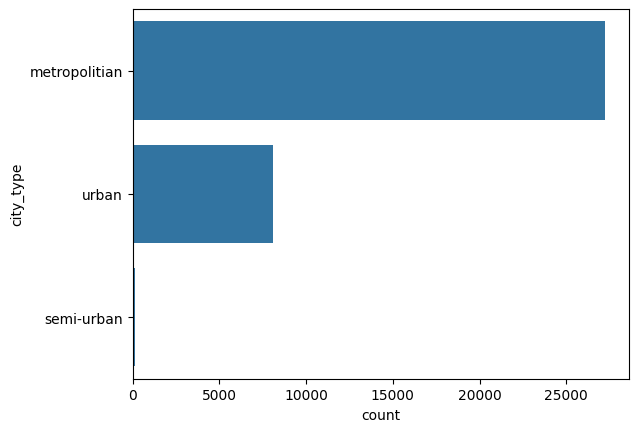

In [78]:
# countplot

sns.countplot(X_train['city_type'])

In [79]:
# mode value

city_type_mode = X_train['city_type'].mode()[0]

<Axes: xlabel='count', ylabel='city_type'>

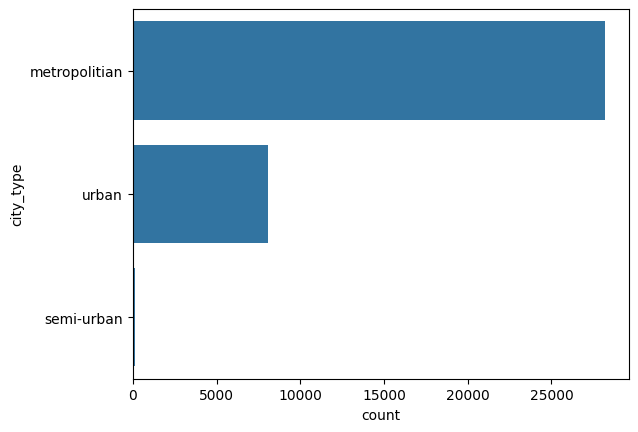

In [80]:
# fill with mode

sns.countplot(X_train['city_type'].fillna(city_type_mode))

In [81]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'time_of_day',
       'distance_km', 'distance_type'],
      dtype='object')

#### Pickup time minutes

In [82]:
# statistical summary

X_train['pickup_time_minutes'].describe()

count    35103.000000
mean         9.998718
std          4.082279
min          5.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         15.000000
Name: pickup_time_minutes, dtype: float64

In [83]:
# missing values in the column

X_train['pickup_time_minutes'].isna().sum()

np.int64(1298)

In [84]:
# median value

pickup_time_minutes_median = X_train['pickup_time_minutes'].median()

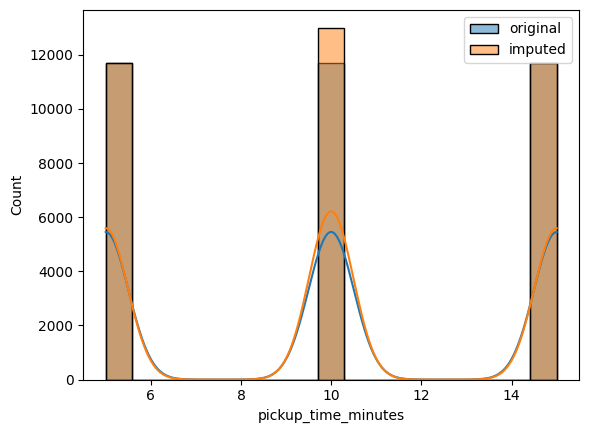

In [85]:
# histplot

sns.histplot(X_train['pickup_time_minutes'],kde=True,label='original')
sns.histplot(X_train['pickup_time_minutes'].fillna(pickup_time_minutes_median),kde=True,label='imputed')
plt.legend()

#### Order time of day

In [86]:
# value counts

X_train['time_of_day'].value_counts()

time_of_day
night        10994
evening      10906
morning       6883
afternoon     5972
Name: count, dtype: int64

In [87]:
# missing values

X_train['time_of_day'].isna().sum()

np.int64(1646)

<Axes: xlabel='count', ylabel='time_of_day'>

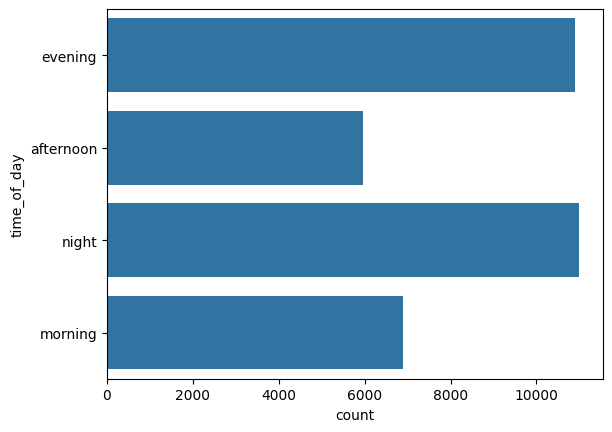

In [88]:
# countplot

sns.countplot(X_train['time_of_day'])

In [89]:
# rows where the data is missing

X_train[X_train['time_of_day'].isna()]

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,extracted_city,order_month,order_day_of_week,order_is_weekend,pickup_time_minutes,time_of_day,distance_km,distance_type
14475,NaN,NaN,stormy,low,2,meal,scooter,1.0,no,metropolitian,MYS,3,Saturday,1,NaN,NaN,1.551458,short
21916,20.0,2.8,sunny,low,2,drinks,scooter,1.0,no,metropolitian,JAP,3,Wednesday,0,10.0,NaN,10.415131,long
34951,28.0,5.0,fog,low,2,snack,motorcycle,1.0,no,metropolitian,HYD,3,Sunday,1,15.0,NaN,16.873858,very_long
8165,NaN,NaN,NaN,NaN,3,meal,scooter,1.0,no,metropolitian,KOL,2,Wednesday,0,NaN,NaN,19.644540,very_long
23469,NaN,NaN,sunny,jam,0,buffet,motorcycle,1.0,no,metropolitian,COIMB,4,Tuesday,0,NaN,NaN,4.664678,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33827,NaN,NaN,NaN,NaN,3,drinks,electric_scooter,1.0,no,urban,GOA,2,Monday,0,NaN,NaN,NaN,NaN
22403,NaN,NaN,sunny,low,0,snack,motorcycle,1.0,no,urban,INDO,3,Monday,0,NaN,NaN,3.020572,short
21518,NaN,NaN,stormy,jam,1,meal,scooter,0.0,no,urban,MYS,4,Saturday,1,NaN,NaN,17.063875,very_long
22002,25.0,5.0,sunny,low,1,meal,scooter,1.0,no,metropolitian,LUDH,2,Tuesday,0,5.0,NaN,8.782068,medium


#### Distance

In [90]:
# statistical summary

X_train['distance_km'].describe()

count    33470.000000
mean         9.722143
std          5.599305
min          1.463837
25%          4.648490
50%          9.177686
75%         13.659771
max         20.942906
Name: distance_km, dtype: float64

In [91]:
# number of missing values

X_train['distance_km'].isna().sum()

np.int64(2931)

In [92]:
# avg distance

distance_mean = X_train['distance_km'].mean()

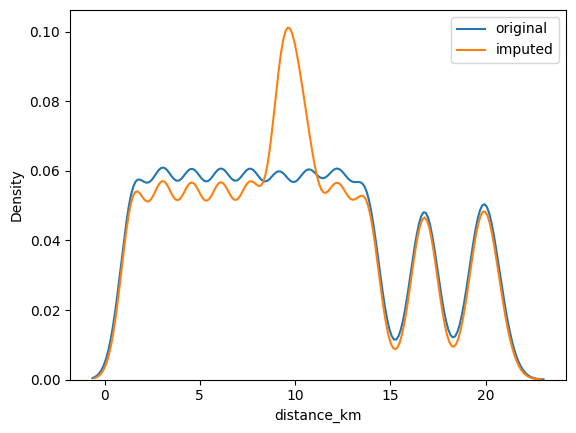

In [93]:
# kdeplot

sns.kdeplot(X_train['distance_km'],label='original')
sns.kdeplot(X_train['distance_km'].fillna(distance_mean),label='imputed')
plt.legend()

In [94]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'time_of_day',
       'distance_km', 'distance_type'],
      dtype='object')

#### Distance Type

In [95]:
# value counts

X_train['distance_type'].value_counts()

distance_type
long         9025
short        8998
medium       8993
very_long    6454
Name: count, dtype: int64

In [96]:
# missing values

X_train['distance_type'].isna().sum()

np.int64(2931)

<Axes: xlabel='count', ylabel='distance_type'>

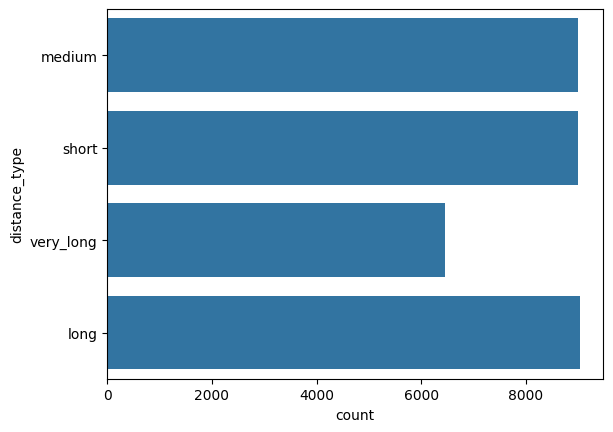

In [97]:
# countplot

sns.countplot(X_train['distance_type'])

Mode cannot be used here

### Imputation Pipeline

In [98]:
nominal_cat_cols

['weather',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'extracted_city',
 'order_month',
 'order_day_of_week',
 'order_is_weekend',
 'time_of_day']

In [99]:
X_train.isna().sum()

age                    1470
ratings                1510
weather                 421
traffic                 407
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     795
festival                188
city_type               968
extracted_city            0
order_month               0
order_day_of_week         0
order_is_weekend          0
pickup_time_minutes    1298
time_of_day            1646
distance_km            2931
distance_type          2931
dtype: int64

In [100]:
# features to fill values with mode

features_to_fill_mode = ['multiple_deliveries','festival','city_type']
features_to_fill_missing = [col for col in nominal_cat_cols if col not in features_to_fill_mode]

features_to_fill_missing

['weather',
 'type_of_order',
 'type_of_vehicle',
 'extracted_city',
 'order_month',
 'order_day_of_week',
 'order_is_weekend',
 'time_of_day']

In [101]:
# simple imputer to fill categorical vars with mode

simple_imputer = ColumnTransformer(transformers=[
    ("mode_imputer",SimpleImputer(strategy="most_frequent"),features_to_fill_mode),
    ("missing_imputer",SimpleImputer(strategy="constant",fill_value="missing"),features_to_fill_missing)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

simple_imputer

,transformers,"[('mode_imputer', ...), ('missing_imputer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [102]:
simple_imputer.fit_transform(X_train)

f:\Project\Delivery-Time-Prediction\epsilon\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


,multiple_deliveries,festival,city_type,weather,type_of_order,type_of_vehicle,extracted_city,order_month,order_day_of_week,order_is_weekend,time_of_day,age,ratings,traffic,vehicle_condition,pickup_time_minutes,distance_km,distance_type
11029,1.0,no,metropolitian,windy,snack,electric_scooter,MUM,3,Wednesday,0,evening,26.0,4.7,jam,2,10.0,9.162284,medium
15665,1.0,no,metropolitian,windy,drinks,motorcycle,SUR,3,Thursday,0,afternoon,21.0,4.9,medium,2,5.0,6.072053,medium
14475,1.0,no,metropolitian,stormy,meal,scooter,MYS,3,Saturday,1,missing,NaN,NaN,low,2,NaN,1.551458,short
29199,1.0,no,metropolitian,windy,buffet,motorcycle,JAP,4,Monday,0,evening,32.0,4.7,medium,0,15.0,20.828106,very_long
22514,0.0,no,urban,sandstorms,meal,scooter,RANCHI,3,Wednesday,0,night,34.0,4.9,jam,1,5.0,9.043263,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,no,metropolitian,sandstorms,meal,scooter,COIMB,4,Monday,0,evening,29.0,4.7,jam,2,5.0,12.438926,long
44732,0.0,no,urban,cloudy,buffet,motorcycle,SUR,3,Wednesday,0,morning,36.0,4.8,low,0,10.0,1.518060,short
38158,0.0,no,metropolitian,fog,buffet,scooter,BHP,2,Thursday,0,evening,36.0,4.4,jam,1,10.0,NaN,NaN
860,1.0,no,metropolitian,windy,meal,scooter,CHEN,3,Saturday,1,afternoon,25.0,4.9,medium,2,5.0,7.745677,medium


In [103]:
simple_imputer.fit_transform(X_train).isna().sum()

f:\Project\Delivery-Time-Prediction\epsilon\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


multiple_deliveries       0
festival                  0
city_type                 0
weather                   0
type_of_order             0
type_of_vehicle           0
extracted_city            0
order_month               0
order_day_of_week         0
order_is_weekend          0
time_of_day               0
age                    1470
ratings                1510
traffic                 407
vehicle_condition         0
pickup_time_minutes    1298
distance_km            2931
distance_type          2931
dtype: int64

In [104]:
# knn imputer

knn_imputer = KNNImputer(n_neighbors=5)

In [106]:
# do basic preprocessing

num_cols = ["age","ratings","pickup_time_minutes","distance_km"]

nominal_cat_cols = ['weather','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type","extracted_city","order_month",
                    "order_day_of_week",
                    "order_is_weekend",
                    "time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [107]:
# generate order for ordinal encoding

traffic_order = ["low","medium","high","jam"]

distance_type_order = ["short","medium","long","very_long"]

In [108]:
# unique categories the ordinal columns

for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['jam' 'medium' 'low' 'high' nan]
distance_type ['medium' 'short' 'very_long' 'long' nan]


In [109]:
# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",
                                     sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order],
                                      encoded_missing_value=-999,
                                      handle_unknown="use_encoded_value",
                                      unknown_value=-1), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


preprocessor

,transformers,"[('scale', ...), ('nominal_encode', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,False
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [110]:
preprocessor.fit_transform(X_train)

f:\Project\Delivery-Time-Prediction\epsilon\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


,age,ratings,pickup_time_minutes,distance_km,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,weather_nan,...,order_day_of_week_Wednesday,order_is_weekend_1,time_of_day_evening,time_of_day_morning,time_of_day_night,time_of_day_nan,traffic,distance_type,vehicle_condition,multiple_deliveries
11029,0.315789,0.88,0.5,0.395216,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,2,1.0
15665,0.052632,0.96,0.0,0.236573,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2,1.0
14475,NaN,NaN,NaN,0.004498,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1.0
29199,0.631579,0.88,1.0,0.994106,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0,1.0
22514,0.736842,0.96,0.0,0.389106,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.473684,0.88,0.0,0.563430,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0,2,0.0
44732,0.842105,0.92,0.5,0.002784,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0
38158,0.842105,0.76,0.5,NaN,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,-1.0,1,0.0
860,0.263158,0.96,0.0,0.322492,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2,1.0


In [111]:
preprocessor.fit_transform(X_train).isna().sum().loc[lambda ser : ser.ge(1)]

f:\Project\Delivery-Time-Prediction\epsilon\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


age                    1470
ratings                1510
pickup_time_minutes    1298
distance_km            2931
multiple_deliveries     795
dtype: int64

In [112]:
# build the pipeline

processing_pipeline = Pipeline(steps=[
                                ("simple_imputer",simple_imputer),
                                ("preprocess",preprocessor),
                                ("knn_imputer",knn_imputer)
                            ])

processing_pipeline

,steps,"[('simple_imputer', ...), ('preprocess', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('mode_imputer', ...), ('missing_imputer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [113]:
# fit and transform the pipeline on X_train

processing_pipeline.fit_transform(X_train)

f:\Project\Delivery-Time-Prediction\epsilon\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
f:\Project\Delivery-Time-Prediction\epsilon\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


,age,ratings,pickup_time_minutes,distance_km,weather_fog,weather_missing,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,...,order_day_of_week_Wednesday,order_is_weekend_1,time_of_day_evening,time_of_day_missing,time_of_day_morning,time_of_day_night,traffic,distance_type,multiple_deliveries,vehicle_condition
11029,0.315789,0.880,0.5,0.395216,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,2.0
15665,0.052632,0.960,0.0,0.236573,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
14475,0.536842,0.896,0.5,0.004498,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
29199,0.631579,0.880,1.0,0.994106,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0
22514,0.736842,0.960,0.0,0.389106,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.473684,0.880,0.0,0.563430,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0,0.0,2.0
44732,0.842105,0.920,0.5,0.002784,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38158,0.842105,0.760,0.5,0.189258,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,-1.0,0.0,1.0
860,0.263158,0.960,0.0,0.322492,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0


In [114]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model_pipe = Pipeline(steps=[
                                ("preprocessing",processing_pipeline),
                                ("model",lr)
                            ])

model_pipe

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('simple_imputer', ...), ('preprocess', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('mode_imputer', ...), ('missing_imputer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3


In [115]:
# fit the pipeline on data

model_pipe.fit(X_train,y_train_pt)

f:\Project\Delivery-Time-Prediction\epsilon\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
f:\Project\Delivery-Time-Prediction\epsilon\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('simple_imputer', ...), ('preprocess', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('mode_imputer', ...), ('missing_imputer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3


In [116]:
# get the predictions
y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

In [117]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [118]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 4.83 minutes
The test error is 4.86 minutes


In [119]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.58
The test r2 score is 0.58


In [120]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42,n_jobs=-1)

model_pipe = Pipeline(steps=[
                                ("preprocessing",processing_pipeline),
                                ("model",rf)
                            ])

model_pipe

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('simple_imputer', ...), ('preprocess', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('mode_imputer', ...), ('missing_imputer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3


In [121]:
# fit the pipeline on data

model_pipe.fit(X_train,y_train_pt.values.ravel())

f:\Project\Delivery-Time-Prediction\epsilon\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
f:\Project\Delivery-Time-Prediction\epsilon\Lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('simple_imputer', ...), ('preprocess', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('mode_imputer', ...), ('missing_imputer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3


In [122]:
# get the predictions
y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

In [123]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [124]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 1.22 minutes
The test error is 3.29 minutes


In [125]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.97
The test r2 score is 0.80
